<a href="https://colab.research.google.com/github/Yog0sh/Fake-news/blob/main/fake_news_simple_nlp_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
not_fake = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [ ]:
X = not_fake["title"].tolist() + fake["title"].tolist()
y = [0] * len(not_fake) + [1] * len(fake)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
!pip install simple_nlp_library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 MB 7.2 MB/s eta 0:00:00


In [ ]:
from simple_nlp_library import preprocessing, embeddings

In [ ]:
stop_words = preprocessing.stop_words()
vectors = embeddings.vectors()

In [ ]:
X_train_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_train]
X_test_vec = [embeddings.tokens_vector(vectors, preprocessing.semantic_tokens(stop_words, x)) for x in X_test]

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(25), early_stopping=True)
clf.fit(X_train_vec, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=25)

In [ ]:
import matplotlib.pyplot as plt

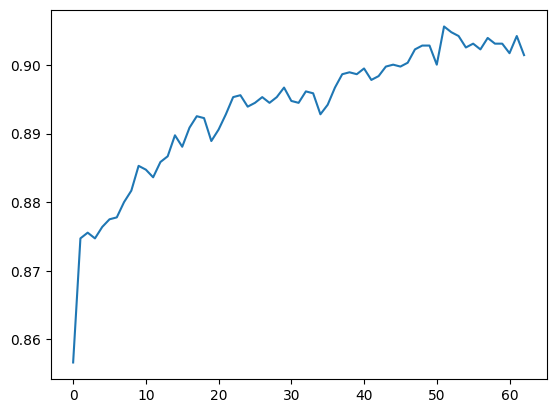

In [ ]:
plt.plot(clf.validation_scores_)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, clf.predict(X_train_vec))

0.9032796926332202

In [ ]:
accuracy_score(y_test, clf.predict(X_test_vec))

0.8887527839643653